* Curriculum Number: CSIE5137
* Course Name: Web Retrieval and Mining
* Student ID: r13921031
* Subject: Assignment 1
* The notebook can be accessed through this [link](https://colab.research.google.com/drive/1kANob-OqrpSt8xZujS04oCCMIp-sm_ok?usp=sharing)

### Question 1. Query processing ###
Consider the Boolean query `X AND NOT Y`.  
Assume x and y are the lengths of the postings lists for X and Y, respectively, and N is the number of documents in total.  
A naive evaluation of the query `X AND NOT Y` would be to calculate (`NOT Y`) first as a new postings list, which takes O(N) time, and the merge it with the postings list for `X`.  
Therefore, the overall complexity will be O(N).    
Please write out a postings merge algorithm that evaluates this query in time O(x + y). 

The algorithm efficiently processes the Boolean query `X AND NOT Y`, where:  
- **X** is a postings list containing document IDs that match query term `X`.  
- **Y** is a postings list containing document IDs that match query term `Y`.  
- The goal is to return a new postings list that contains all document IDs in `X` that **do not** appear in `Y`.  


#### **Key Idea**  
Instead of first computing `NOT Y` (which takes \(O(N)\) time), we merge `X` and `Y` in a single pass using **two pointers**, ensuring that the algorithm runs in **O(x + y) time**.

### **Step-by-Step Algorithm**  

1. **Initialize an empty list** `answer` to store the result.  
2. **Use two pointers** to traverse `X` and `Y` simultaneously.  
3. **Compare the current document IDs** in `X` and `Y`:  
   - If `docID(X) == docID(Y)`, this means the document appears in both lists, so **skip it** (move both `X` and `Y` forward).  
   - If `docID(X) < docID(Y)`, this means `docID(X)` is not in `Y`, so **add it to `answer` and move `X` forward**.  
   - If `docID(Y) < docID(X)`, this means `docID(Y)` is smaller, so **just move `Y` forward** (since it has no effect on `X`).  
4. **Return `answer`** when the traversal is complete.  

### **🤔 1️⃣Why does `docID(X) < docID(Y)` mean `docID(X)` is not in `Y`?**  

#### **Key Observation**
- Both **X** and **Y** are assumed to be **sorted lists** of document IDs.
- We are iterating through both lists **in order**, comparing the smallest remaining document IDs at each step.

#### **Case: `docID(X) < docID(Y)`**
- This means that the current document in `X` comes **before** the current document in `Y`.  
- Since `Y` is sorted, we know that any document **before `docID(Y)`** has **already been checked** in `Y`.  
- Because `docID(X)` is smaller, it **cannot appear later in `Y`** (since `Y` is sorted in increasing order).  

👉 **Conclusion:**  
- Since we **already passed any smaller values in `Y`**, we know `docID(X)` is **not in `Y`**.  
- Therefore, we **add `docID(X)` to the result** and move `X` forward.  

### **🤔 2️⃣Why does `docID(Y) < docID(X)` mean we should move `Y` forward?**  

#### **Case: `docID(Y) < docID(X)`**
- This means that the current document in `Y` comes **before** the current document in `X`.  
- Since `X` is sorted, and we are checking in order, this means `docID(Y)` **cannot be in `X`** (we already passed it, or it was never there).  
- However, we **do not add `docID(Y)` to the answer**, because our goal is `X AND NOT Y`—we only care about documents that are in `X`, not `Y`.  

👉 **Conclusion:**  
- Since `docID(Y)` is **not relevant**, we simply **move `Y` forward** and continue comparing.

```python
def AND_NOT(X, Y):
    """
    X AND NOT Y を計算するための投稿リストのマージアルゴリズム。
    計算量は O(x + y) で、非効率な O(N) の方法を避ける。
    """
    answerList = []  # 結果を格納するリスト
    
    # XとYの投稿リストを同時にスキャン
    while X is not None and Y is not None:
        if docID(X) == docID(Y):  
            # X と Y が同じ文書 ID を持つ場合、X をスキップ（AND NOT のため）
            X = next(X)
            Y = next(Y)
        elif docID(X) < docID(Y):  
            # 🤔 1️⃣ X の文書 ID が Y より小さい場合、docID(X) is not in Y ===> X は結果に追加
            answerList.append(docID(X))
            X = next(X)  # 次の X へ移動
        else:  
            # 🤔 2️⃣Y の方が小さい場合、Y をスキップ（X に関係ないため）
            Y = next(Y)

    return answerList  # 計算結果を返す
```

#### Small Example.
```python
X = [2, 3, 6, 8, 11]  # Documents that match query X
Y = [3, 6, 7, 10]     # Documents that match query Y
```

#### **Step-by-Step Execution**  

| Step | `X` Pointer | `Y` Pointer | Comparison            | Action              | `answer` List |
|------|------------|------------|----------------------|---------------------|--------------|
| 1    | 2          | 3          | `2 < 3`              | Add `2`, move `X`   | `[2]`        |
| 2    | 3          | 3          | `3 == 3`             | Skip both `X` & `Y` | `[2]`        |
| 3    | 6          | 6          | `6 == 6`             | Skip both `X` & `Y` | `[2]`        |
| 4    | 8          | 7          | `8 > 7`              | Move `Y`            | `[2]`        |
| 5    | 8          | 10         | `8 < 10`             | Add `8`, move `X`   | `[2, 8]`     |
| 6    | 11         | 10         | `11 > 10`            | Move `Y`            | `[2, 8]`     |
| 7    | 11         | End        | `Y` is finished      | Add remaining `11`  | `[2, 8, 11]` |

### **Summary**
This algorithm:
1. Maintains two pointers, one for each postings list
2. Traverses both lists in a coordinated manner
3. Only adds documents to the result when they are in X but not in Y
4. Advances pointers based on comparison results

The time complexity is O(x + y) because:
- Each pointer moves through its respective list exactly once
- Each comparison operation takes constant time
- We never need to scan the entire collection of N documents

This approach is much more efficient than the naive O(N) method, especially when dealing with sparse postings lists where x and y are much smaller than N.

## ✅Question 2. Zipf’s law
Assume that the frequency distribution of words in a collection of documents C roughly follows the Zipf’s law:   $r \cdot p(w_r | C) = 0.1$

where:
- $ r = 1, 2, 3...$ is the rank of a word in the descending order of frequency.  (1 for the most frequent, 2 for the second most, etc.).
- w_r is the word at rank r.  
- $ p(w_r | C) $ is the probability (frequency) of word w_r in the collection.  


### ✅Question 2-1. 1st most frequent word:
What is the probability of the most frequent word in the collection?

For the most frequent word ($ r = 1 $):

$
1 \cdot p(w_1 | C) = 0.1
$

$
p(w_1 | C) = 0.1
$

So, the most frequent word appears with probability **0.1 (or 10%)**.


### ✅Question 2-2. 2nd most frequent word:
What is the probability of the second most frequent word in the collection?

For the second most frequent word ($ r = 2 $):

$
2 \cdot p(w_2 | C) = 0.1
$

$
p(w_2 | C) = \frac{0.1}{2} = 0.05
$

So, the second most frequent word appears with probability **0.05 (or 5%)**.


### ✅Question 2-3. CDF:
When calculating the probabilities for more words, you will find that the top 50 most frequent words account for about 45%.  
That’s nearly a half of the text!

The cumulative probability of the top 50 words:

$
\sum_{r=1}^{50} p(w_r | C) = \sum_{r=1}^{50} \frac{0.1}{r} \approx 0.45
$

This demonstrates the rapid decline in word frequency that Zipf's law predicts.   
The most frequent word accounts for 10% of all word occurrences, while the second most frequent word accounts for half that at 5%.

Indeed, if we continued this calculation for the top 50 words and summed their probabilities, we would find that they account for approximately 45% of all text in the collection, which aligns with the statement in the problem.

Probability of the most frequent word (rank 1): 0.100000
Probability of the second most frequent word (rank 2): 0.050000
Probability of the third most frequent word (rank 3): 0.033333
Sum of all probabilities: 0.978761
Is the probability distribution valid? False
Top 50 words account for 0.449921 (44.99%) of the text


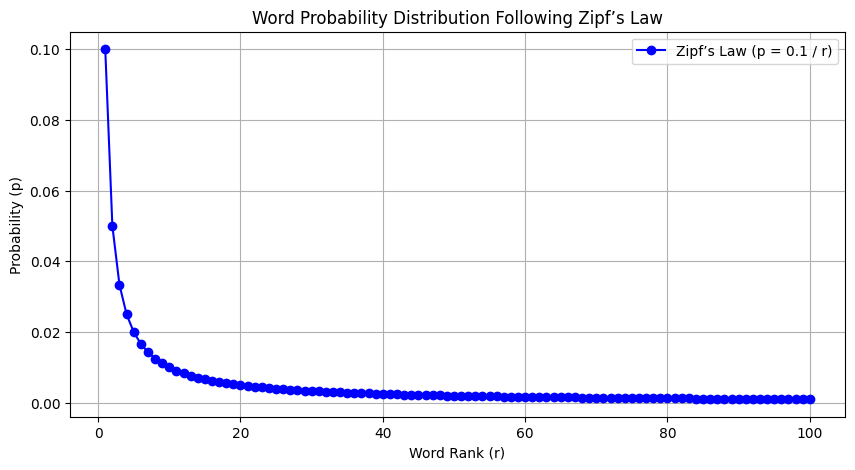

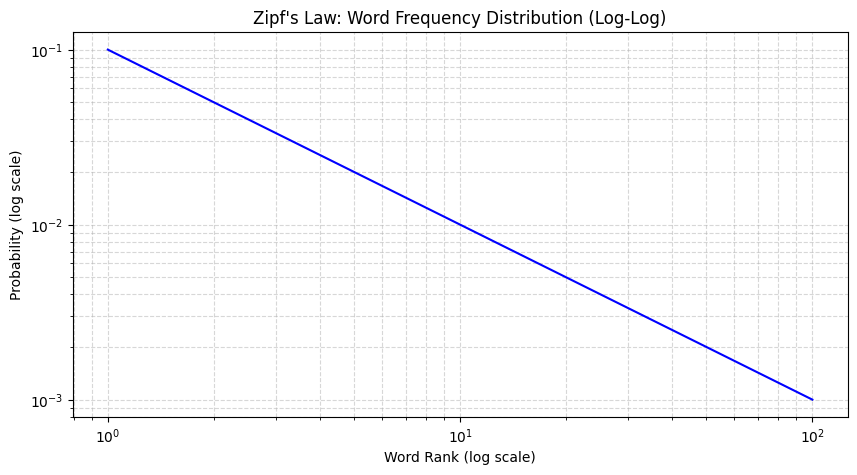

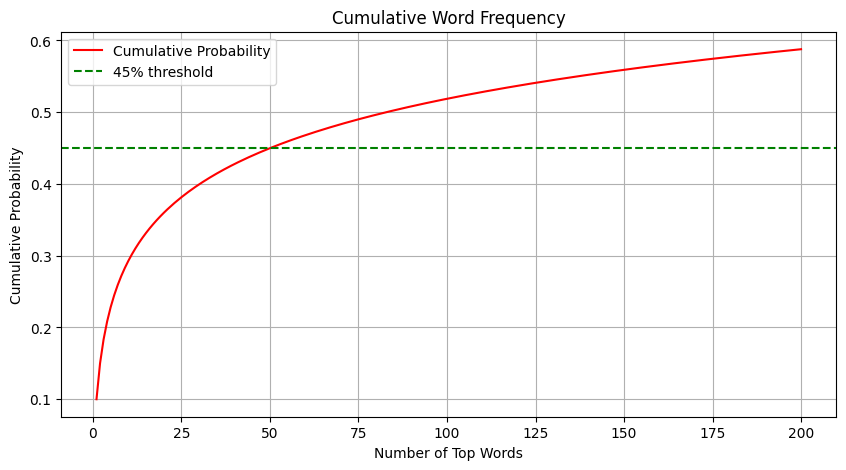

It takes approximately 51 words to reach 45% of the text


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate word probabilities according to Zipf's law
def zipf_distribution(n_words, constant=0.1):
    """
    Generate word probabilities following Zipf's law: r * p(w_r) = constant
    
    Parameters:
    n_words (int): Number of words to generate probabilities for
    constant (float): The constant in Zipf's law equation
    
    Returns:
    np.array: Array of probabilities for each word rank
    """
    ranks = np.arange(1, n_words + 1)
    probabilities = constant / ranks
    return probabilities

# Validate that the probabilities sum to 1 (approximately)
def validate_distribution(probs):
    """Check if the probabilities sum to approximately 1"""
    total = np.sum(probs)
    print(f"Sum of all probabilities: {total:.6f}")
    return abs(total - 1.0) < 0.01

# Calculate the most frequent words' contribution
def top_words_percentage(probs, n_top):
    """Calculate what percentage the top n words contribute"""
    top_sum = np.sum(probs[:n_top])
    print(f"Top {n_top} words account for {top_sum:.6f} ({top_sum*100:.2f}%) of the text")
    return top_sum

# Plot probability distribution
def plot_zipf_distribution(probs, top_n=100):
    """Plot Zipf's law distribution in both linear and log-log scales"""
    ranks = np.arange(1, len(probs) + 1)

    # Linear Scale Plot
    plt.figure(figsize=(10, 5))
    plt.plot(ranks[:top_n], probs[:top_n], marker='o', linestyle='-', color='b', label='Zipf’s Law (p = 0.1 / r)')
    plt.xlabel("Word Rank (r)")
    plt.ylabel("Probability (p)")
    plt.title("Word Probability Distribution Following Zipf’s Law")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Log-Log Scale Plot
    plt.figure(figsize=(10, 5))
    plt.plot(ranks[:top_n], probs[:top_n], 'b-')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Word Rank (log scale)')
    plt.ylabel('Probability (log scale)')
    plt.title("Zipf's Law: Word Frequency Distribution (Log-Log)")
    plt.grid(True, which="both", ls="--", alpha=0.5)
    plt.show()

# Plot cumulative distribution
def plot_cumulative_distribution(probs, top_n=200):
    """Plot the cumulative probability distribution"""
    cumulative = np.cumsum(probs)

    plt.figure(figsize=(10, 5))
    plt.plot(range(1, top_n + 1), cumulative[:top_n], 'r-', label="Cumulative Probability")
    plt.xlabel('Number of Top Words')
    plt.ylabel('Cumulative Probability')
    plt.title('Cumulative Word Frequency')
    plt.grid(True)
    plt.axhline(y=0.45, color='g', linestyle='--', label='45% threshold')
    plt.legend()
    plt.show()

    # Find how many words it takes to reach 45%
    words_for_45_percent = np.searchsorted(cumulative, 0.45) + 1
    print(f"It takes approximately {words_for_45_percent} words to reach 45% of the text")

# Main validation
def validate_zipfs_law():
    # Generate probabilities for a large vocabulary (e.g., 10,000 words)
    n_words = 10000
    word_probs = zipf_distribution(n_words)
    
    # Print probabilities of the most frequent words
    print(f"Probability of the most frequent word (rank 1): {word_probs[0]:.6f}")
    print(f"Probability of the second most frequent word (rank 2): {word_probs[1]:.6f}")
    print(f"Probability of the third most frequent word (rank 3): {word_probs[2]:.6f}")
    
    # Check distribution validity
    is_valid = validate_distribution(word_probs)
    print(f"Is the probability distribution valid? {is_valid}")
    
    # Check top 50 words percentage
    top_words_percentage(word_probs, 50)
    
    # Generate plots
    plot_zipf_distribution(word_probs, top_n=100)
    plot_cumulative_distribution(word_probs, top_n=200)

# Run the validation
validate_zipfs_law()


## Introduction to Information Retrieval ##
### 5.3 Postings file compression ###
#### 5.3.2 γ codes ####
The unary code of n is a string of n ones followed by a zero.  
How efficient can a code be in principle?   
Assuming the 2^n gaps G with 1 ≤ G ≤ 2^n are all equally likely, the optimal encoding uses n bits for each G. 
So some gaps (G = 2^n in this case) cannot be encoded with fewer than log_{2}(G) bits. 
Our goal is to get as close to this lower bound as possible
A method that is within a factor of optimal is γ encoding.  
γ codes implement variable-length encoding by splitting the representation of a gap G into a pair of length and offset.   
Offset is G in binary, but with the leading 1 removed.  
For example, for for the decimal number 13 its binary representation is 1101, removing the leading 1, we get the offset to be 101.   
Length encodes the length of offset in unary code.   
For 13, the length of offset "101" is 3 bits. We represent 3 into unary, which is 1110.  
The γ code of 13 is therefore "1110101", the concatenation of length 1110 and offset 101.

## ✅Question 3. γ code ###
From the following sequence of γ-coded gaps, reconstruct the gap sequence and then the postings sequence:
1110001110101011111101101111011.

In [8]:
def gamma_decoding(gamma_encoded_string):
    """
    ガンマ符号化された文字列を元の数値リストにデコードします。
    デコードプロセスは、長さのユーナリーコードを読み取り、
    次にその数値の2進数表現を読み取ることです。
    
    :param gamma_encoded_string: デコードするガンマ符号化された文字列。
    :return: デコードされた整数のリスト（ギャップシーケンス）。
    """
    result = []  # ここにデコードされた数値（ギャップシーケンス）を格納します。
    
    while gamma_encoded_string:
        # 最初の '0' の位置を見つけます。これがユーナリーコードの終わりを示します。
        zero_pos = gamma_encoded_string.find("0")
        length = zero_pos
        
        # 完全な数値をデコードするためのビットが足りない場合は、ループを終了します。
        if len(gamma_encoded_string) < zero_pos + length + 1:
            break
        
        # '0' の後の2進数表現部分（オフセット）を抽出します。
        offset = gamma_encoded_string[zero_pos + 1:zero_pos + length + 1]
        
        # 値は、(2^length) にオフセットを加えたものとして計算されます。
        value = (1 << length) + (int(offset, 2) if offset else 0)
        
        # デコードした値（ギャップ値）を結果リストに追加します。
        result.append(value)
        
        # 次のコードに進むために、ガンマ文字列を更新します。
        gamma_encoded_string = gamma_encoded_string[zero_pos + length + 1:]
    
    return result

def calculate_posting_list(gap_list):
    """
    ギャップシーケンスからポスティングシーケンスを計算します。
    ポスティングシーケンスは、ギャップシーケンスの累積和です。
    
    :param gap_list: ギャップシーケンスを表す整数のリスト。
    :return: ポスティングシーケンスを表す整数のリスト。
    """
    cumulative_sum = 0
    return [cumulative_sum := cumulative_sum + gap for gap in gap_list]

if __name__ == '__main__':
    # 提供されたガンマコードをデコードし、ギャップシーケンスを表示します。
    gamma_encoded_string = "1110001110101011111101101111011"
    gap_list = gamma_decoding(gamma_encoded_string)

    print(f"Gap List: {gap_list}")
    
    # ギャップシーケンスからポスティングシーケンスを計算します。
    posting_list = calculate_posting_list(gap_list)
    print(f"Posting List: {posting_list}")


Gap List: [9, 6, 3, 59, 7]
Posting List: [9, 15, 18, 77, 84]


### **Problem Statement**:
We are tasked with decoding a given **Gamma encoded string** into a sequence of **γ-coded gaps**. Gamma encoding uses a **unary code** to represent the length of the binary number that follows, and the binary representation of the number is used to encode the value. The sequence of gaps represents the difference between consecutive numbers.

### **Given Gamma Encoded String**:
```
1110001110101011111101101111011
```

---

### **Step-by-Step Decoding Process**:

We will decode the given Gamma-encoded string by following the standard decoding method:

1. **Extract the unary prefix**, which tells us how long the binary number will be.
2. **Interpret the binary number** that follows the unary code, with the leading "1" added back to the binary number.
3. **Calculate the value** by converting the binary number (after adding the leading "1") to its decimal form.
4. **Repeat the process** for the remaining string, extracting and decoding subsequent gaps.

---

### **🎯Step 1: Decode the first gap**.

- **Gamma Encoded String**:
  ```
  1110001110101011111101101111011
  ```
- **Extract the first unary code**: 
  The unary code `1110` tells us that the next number's binary representation will be of length 3 bits.
- **Remaining String** after removing the unary code `1110`:
  ```
  001110101011111101101111011
  ```
- **Extract the next binary number (3 bits)**: 
  The next 3 bits are `001`. Adding the leading `1` gives us `1001`.
- **Convert the binary value** `1001` to decimal:
  ```sql
  1001 (binary) = 9 (decimal)
  ```
- **First Gap**: 9

---

### **🎯Step 2: Decode the second gap**.

- **String (after Step 1)**:
  ```
  110101011111101101111011
  ```
- **Extract the next unary code**:
  The unary code `110` tells us that the next number's binary representation will be of length 2 bits.
- **Remaining String** after removing the unary code `110`:
  ```
  101011111101101111011
  ```
- **Extract the next binary number (2 bits)**: 
  The next 2 bits are `10`. Adding the leading `1` gives us `110`.
- **Convert the binary value** `110` to decimal:
  ```sql
  110 (binary) = 6 (decimal)
  ```
- **Second Gap**: 6

---

### **🎯Step 3: Decode the third gap**.

- **Original String (after Step 2)**:
  ```
  1011111101101111011
  ```
- **Extract the next unary code**:
  The unary code `10` tells us that the next number's binary representation will be of length 1 bit.
- **Remaining String** after removing the unary code `10`:
  ```
  11111101101111011
  ```
- **Extract the next binary number (1 bit)**: 
  The next 1 bit is `1`. Adding the leading `1` gives us `11`.
- **Convert the binary value** `11` to decimal:
  ```sql
  11 (binary) = 3 (decimal)
  ```
- **Third Gap**: 3

---

### **🎯Step 4: Decode the fourth gap**.

- **Original String (after Step 3)**:
  ```
  1111101101111011
  ```
- **Extract the next unary code**:
  The unary code `111110` tells us that the next number's binary representation will be of length 5 bits.
- **Remaining String** after removing the unary code `111110`:
  ```
  1101111011
  ```
- **Extract the next binary number (5 bits)**:
  The next 5 bits are `11011`. Adding the leading `1` gives us `111011`.
- **Convert the binary value** `111011` to decimal:
  ```sql
  111011 (binary) = 59 (decimal)
  ```
- **Fourth Gap**: 59

---

### **🎯Step 5: Decode the fifth gap**.

- **String (after Step 4)**:
  ```
  11011
  ```
- **Extract the next unary code**:
  The unary code `110` tells us that the next number's binary representation will be of length 2 bits.
- **Remaining String** after removing the unary code `110`:
  ```
  11
  ```
- **Extract the next binary number (2 bits)**:
  The next 2 bits are `11`. Adding the leading `1` gives us `111`.
- **Convert the binary value** `111` to decimal:
  ```sql
  111 (binary) = 7 (decimal)
  ```
- **Fifth Gap**: 7

---

### **Final Decoded Gaps**:
After decoding each gap, we obtain the following **sequence of γ-coded gaps**:
```
9, 6, 3, 59, 7
```

---

### **Conclusion**:
The provided Gamma encoded string `1110001110101011111101101111011` is successfully decoded into the sequence of **gaps**: `9, 6, 3, 59, 7`. Each gap corresponds to the differences between consecutive numbers, and this process involved interpreting the unary and binary parts of the Gamma encoding.

### **Calculating the Postings Sequence**

The **Postings Sequence** is derived by progressively summing the values of the **Gap Sequence**.

Given the **Gap Sequence**:
```
9, 6, 3, 59, 7
```

We calculate the **Postings Sequence** as follows:

1. The first number in the **Postings Sequence** is the same as the first number in the **Gap Sequence**:
   - Postings[1] = 9

2. The second number in the **Postings Sequence** is the sum of the first and second numbers in the **Gap Sequence**:
   - Postings[2] = 9 + 6 = 15

3. The third number is the sum of the first three numbers in the **Gap Sequence**:
   - Postings[3] = 9 + 6 + 3 = 18

4. The fourth number is the sum of the first four numbers in the **Gap Sequence**:
   - Postings[4] = 9 + 6 + 3 + 59 = 77

5. The fifth number is the sum of all five numbers in the **Gap Sequence**:
   - Postings[5] = 9 + 6 + 3 + 59 + 7 = 84

Thus, the **Postings Sequence** is:
```
9, 15, 18, 77, 84
```

### **Final Summary**

To summarize:

- The **Gamma Encoded String** `1110001110101011111101101111011` is decoded into the **Gap Sequence**:  
  ```
  9, 6, 3, 59, 7
  ```

- The **Postings Sequence**, which is calculated by progressively summing the values of the Gap Sequence, is:  
  ```
  9, 15, 18, 77, 84
  ```

This completes the decoding and the calculation of the Postings Sequence based on the provided Gamma encoding.

## ✅Question 4. Skip pointer ###
The optimal skip distance c can be determined by minimizing the quantity (k*n/c + p*c/2)  
 - k is the skip pointer length  
 - n is the total inverted list size  
 - c is the skip interval  
 - p is the number of postings to find.  

### ✅Question 4-1. Skip pointer : Plot 1 ###
Plot this function $(\frac{k*n}{c} + \frac{p*c}{2})$ w.r.t. variable c.
 - k = 4 is the skip pointer length  
 - n = 1000000 is the total inverted list size  
 - c is the skip interval  
 - p = 1000 is the number of postings to find

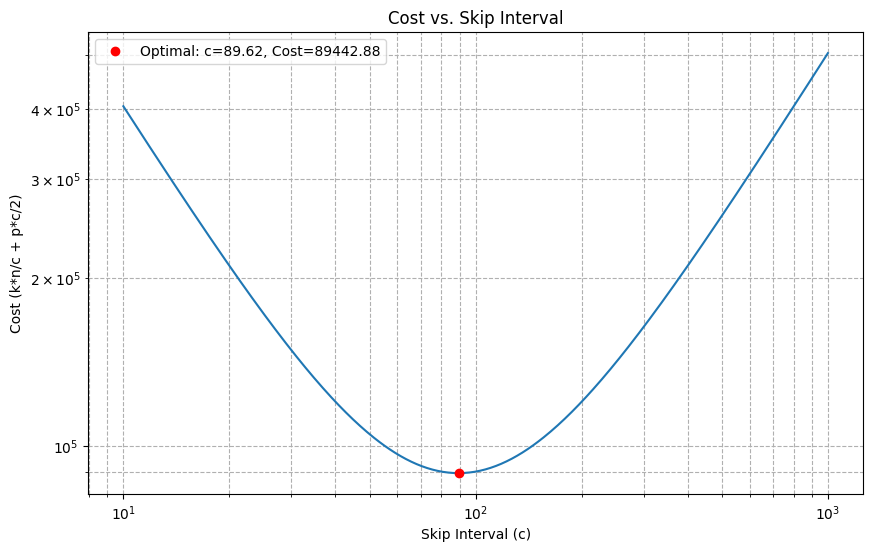

Minimum Cost: 89442.88479764017
Optimal Skip Interval (c): 89.61505019466045


In [3]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_cost(c, k, n, p):
  """Calculates the cost function (k*n/c + p*c/2)."""
  return (k * n / c) + (p * c / 2)

# Parameters
k = 4
n = 1000000
p = 1000

# Range of c values
c_values = np.logspace(1, 3, 400)  # Logarithmic scale for better visualization

# Calculate costs
costs = calculate_cost(c_values, k, n, p)

# Find the minimum cost and the optimal c.
min_cost = np.min(costs)
optimal_c = c_values[np.argmin(costs)]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(c_values, costs)
plt.xscale('log') #use log scale for x axis
plt.yscale('log') #use log scale for y axis
plt.xlabel('Skip Interval (c)')
plt.ylabel('Cost (k*n/c + p*c/2)')
plt.title('Cost vs. Skip Interval')
plt.grid(True, which="both", ls="--")

# Mark the optimal point
plt.plot(optimal_c, min_cost, 'ro', label=f'Optimal: c={optimal_c:.2f}, Cost={min_cost:.2f}') # 'ro' makes it a red circle
plt.legend() # add legend to the graph

plt.show()

print(f"Minimum Cost: {min_cost}")
print(f"Optimal Skip Interval (c): {optimal_c}")

### ✅Question 4-2. Skip pointer : Plot 2 ###
Plot this function $(\frac{k*n}{c} + \frac{p*c}{2})$ w.r.t. variable c.
 - k = 4 is the skip pointer length  
 - n = 1000000 is the total inverted list size  
 - c is the skip interval  
 - p = 10000 is the number of postings to find 

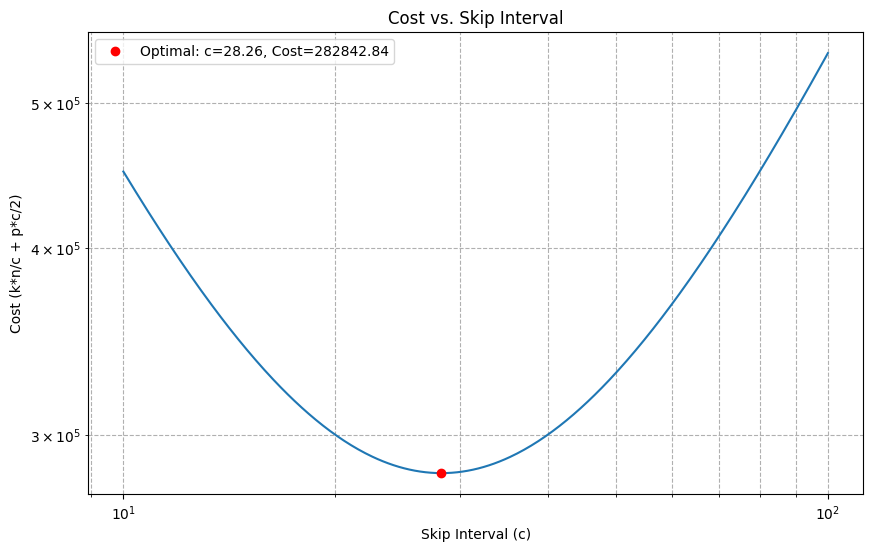

Minimum Cost: 282842.842965681
Optimal Skip Interval (c): 28.257115029208283


In [4]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_cost(c, k, n, p):
  """Calculates the cost function (k*n/c + p*c/2)."""
  return (k * n / c) + (p * c / 2)

# Parameters
k = 4
n = 1000000
p = 10000

# Range of c values
c_values = np.logspace(1, 2, 400)  # Logarithmic scale for better visualization

# Calculate costs
costs = calculate_cost(c_values, k, n, p)

# Find the minimum cost and the optimal c.
min_cost = np.min(costs)
optimal_c = c_values[np.argmin(costs)]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(c_values, costs)
plt.xscale('log') #use log scale for x axis
plt.yscale('log') #use log scale for y axis
plt.xlabel('Skip Interval (c)')
plt.ylabel('Cost (k*n/c + p*c/2)')
plt.title('Cost vs. Skip Interval')
plt.grid(True, which="both", ls="--")

# Mark the optimal point
plt.plot(optimal_c, min_cost, 'ro', label=f'Optimal: c={optimal_c:.2f}, Cost={min_cost:.2f}') # 'ro' makes it a red circle
plt.legend() # add legend to the graph

plt.show()

print(f"Minimum Cost: {min_cost}")
print(f"Optimal Skip Interval (c): {optimal_c}")

### ✅Question 4-3. Skip pointer : Description of changes in c_opt ###
Describe how the optimal value for c changes.  
| Number of Postings (p) | Minimum Cost        | Optimal Skip Interval (c) |
|-------------------------|---------------------|---------------------------|
| 1000                    | 89442.88479764017   | 89.61505019466045         |
| 10000                   | 282842.842965681    | 28.257115029208283        |


**Description of Changes in Optimal `c`:**

When `p` increases from 1000 to 10000, the optimal value for `c` **increases**.   
The reason can be described as the following.

* **Impact of `p`:** The term `p*c/2` in the cost function becomes more significant as `p` increases. This term represents the cost of traversing regular postings.
* **Balancing the Terms:** To minimize the overall cost, we need to balance the two terms `k*n/c` and `p*c/2`.
* **Shift in Optimal `c`:** When `p` is larger, the `p*c/2` term grows faster with increasing `c`. Therefore, the minimum point of the cost function shifts to the right, meaning a larger `c` is required to balance the equation and minimize the overall cost.
* **Intuitive Explanation:**
    * When you expect to find more postings (`p` is high), you want to skip less frequently (larger `c`) to reduce the number of regular postings you need to check.
    * Conversely, if you expect to find fewer postings (`p` is low), you want to skip more frequently (smaller `c`) to reduce the number of skip pointer traversals.
* **Numerical Results:** As shown in the outputs:
    * For `p=1000`, the optimal `c` is approximately 89.62. (this differs a little bit from the theoretical derived value 89.44)
    * For `p=10000`, the optimal `c` is approximately 28.257. (this differs a little bit from the theoretical derived value 28.28)

    The optimal c is larger when p=10000, as predicted.

### ✅Question 4-4. Skip pointer : Take derivative ###
Finally, take the derivative of the function (k*n/c + p*c/2) in terms of c to find the optimum value for c for a given set of other parameters, i.e., k, n, and p.

In [5]:
import sympy as sp

# Define symbolic variables
c, k, n, p = sp.symbols('c k n p', real=True, positive=True)

# Define the cost function
cost = (k * n / c) + (p * c / 2)

# Calculate the derivative with respect to c
derivative = sp.diff(cost, c)

# Find the critical point by setting the derivative to zero and solving for c
critical_points = sp.solve(derivative, c)

# The critical point is the optimal c
optimal_c = critical_points[0]

print("Derivative of the cost function with respect to c:")
print(derivative)

print("\nOptimal value for c:")
print(optimal_c)

#Verify the second derivative is positive, showing a minimum.
second_derivative = sp.diff(derivative, c)
print("\nSecond Derivative of the cost function with respect to c:")
print(second_derivative)

#Subsitute the optimal c to the second derivative to verify it is positive.
second_derivative_at_opt_c = second_derivative.subs(c, optimal_c)
print("\nSecond Derivative evaluated at optimal c:")
print(second_derivative_at_opt_c)

Derivative of the cost function with respect to c:
p/2 - k*n/c**2

Optimal value for c:
sqrt(2)*sqrt(k)*sqrt(n)/sqrt(p)

Second Derivative of the cost function with respect to c:
2*k*n/c**3

Second Derivative evaluated at optimal c:
sqrt(2)*p**(3/2)/(2*sqrt(k)*sqrt(n))


1.  **Symbolic Variables:**
    * We use `sympy.symbols` to define `c`, `k`, `n`, and `p` as symbolic variables. This allows us to perform symbolic differentiation.
    * We specify that these variables are `real` and `positive` because skip intervals, lengths, and counts cannot be negative or imaginary.

2.  **Cost Function:**
    * We define the cost function `cost` using the symbolic variables.

3.  **Derivative:**
    * We use `sp.diff(cost, c)` to calculate the derivative of the cost function with respect to `c`.

4.  **Critical Point:**
    * To find the optimal `c`, we set the derivative to zero and solve for `c` using `sp.solve(derivative, c)`. This gives us the critical point(s).

5.  **Optimal `c`:**
    * The critical point(s) represent potential minima or maxima. In this case, there will only be one critical point, and it will be the minimum.

6.  **Second Derivative:**
    * To confirm that the critical point is a minimum, we calculate the second derivative of the cost function with respect to `c` using `sp.diff(derivative, c)`.
    * If the second derivative is positive at the critical point, it confirms that the point is a minimum.
7. **Second Derivative evaluated at optimal c:**
    * We substitute the optimal c value into the second derivative. If the result is positive, it verifies that the optimal c is a minimum.

**Result:**

The output shows

* **Derivative:** $\frac{p}{2} - \frac{k*n}{c^2}$
* **Optimal ``:** $c_{\text{opt}} = \sqrt{ \frac{2*k*n}{p} }$
* **Second Derivative:** $\frac{2*k*n}{c^3}$
* **Second Derivative evaluated at optimal $c_{\text{opt}}$:** $\frac{p}{\sqrt{\frac{2*k*n}{p}}}$ which is always positive for positive k,n and p.

Therefore, the optimal skip interval `c` is given by the formula: $c_{\text{opt}} = \sqrt{ \frac{2*k*n}{p} }$

This formula provides a direct way to calculate the optimal skip interval for given values of `k`, `n`, and `p`.

The optimal skip interval $ c $ is given by ( for our case k = 4, n = 10^6)

$
c_{\text{opt}} = \frac{2000\sqrt{2}}{\sqrt{p}}
$

### Validate the observations in question 4-3.
1. When $ p = 1000 $:
   $
   c_{\text{opt}} = \frac{2000\sqrt{2}}{\sqrt{1000}} \approx 89.44
   $

2. When $ p = 10000 $:
   $
   c_{\text{opt}} = \frac{2000\sqrt{2}}{\sqrt{10000}} \approx 28.28
   $

Thus, as $ p $ increases, the optimal $ c $ decreases. This means that when searching for more postings, the optimal skip distance should be smaller, allowing for finer granularity in traversal.

### Visualization ###
Finally, we combine the two graphs together and annotate the optimal points using the theoretically derived values.

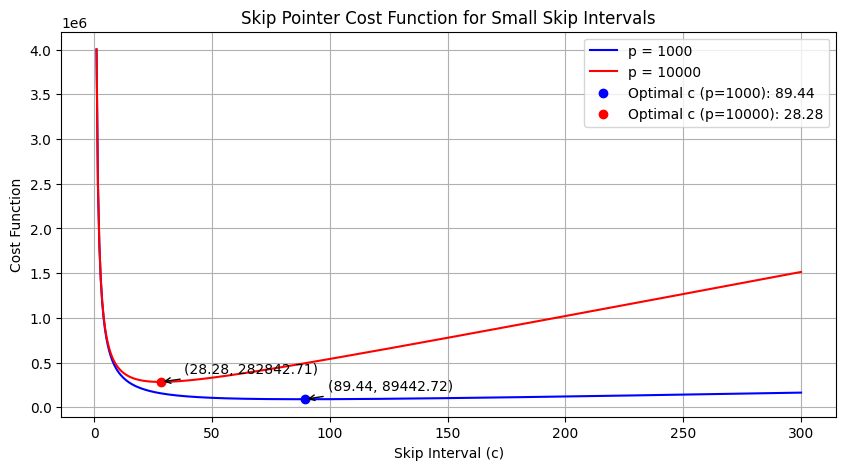

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Given parameters
k = 4
n = 1000000

# Define function for the cost
def skip_pointer_cost(c, p, k, n):
    return (k * n / c) + (p * c / 2)

# Range of c values (avoiding zero to prevent division errors)
c_values = np.linspace(1, 10000, 500)

# Compute costs for p = 1000
p1 = 1000
costs_p1 = [skip_pointer_cost(c, p1, k, n) for c in c_values]

# Compute costs for p = 10000
p2 = 10000
costs_p2 = [skip_pointer_cost(c, p2, k, n) for c in c_values]

# Compute optimal c values for given p values
optimal_c_p1 = 2000 * np.sqrt(2) / np.sqrt(p1)
optimal_c_p2 = 2000 * np.sqrt(2) / np.sqrt(p2)

# Compute corresponding costs
optimal_cost_p1 = skip_pointer_cost(optimal_c_p1, p1, k, n)
optimal_cost_p2 = skip_pointer_cost(optimal_c_p2, p2, k, n)

# Define a smaller range for c values to focus on small skip intervals
c_values_small = np.linspace(1, 300, 500)

# Compute costs for the smaller range
costs_p1_small = [skip_pointer_cost(c, p1, k, n) for c in c_values_small]
costs_p2_small = [skip_pointer_cost(c, p2, k, n) for c in c_values_small]

# Plot focusing on small c values
plt.figure(figsize=(10, 5))
plt.plot(c_values_small, costs_p1_small, label="p = 1000", color='blue')
plt.plot(c_values_small, costs_p2_small, label="p = 10000", color='red')

# Mark optimal points if they fall within the small interval range
if optimal_c_p1 <= max(c_values_small):
    plt.scatter(optimal_c_p1, optimal_cost_p1, color='blue', marker='o', label=f'Optimal c (p=1000): {optimal_c_p1:.2f}')
    plt.annotate(f'({optimal_c_p1:.2f}, {optimal_cost_p1:.2f})', 
                 xy=(optimal_c_p1, optimal_cost_p1), xytext=(optimal_c_p1 + 10, optimal_cost_p1 + 1e5),
                 arrowprops=dict(facecolor='blue', arrowstyle='->'))

if optimal_c_p2 <= max(c_values_small):
    plt.scatter(optimal_c_p2, optimal_cost_p2, color='red', marker='o', label=f'Optimal c (p=10000): {optimal_c_p2:.2f}')
    plt.annotate(f'({optimal_c_p2:.2f}, {optimal_cost_p2:.2f})', 
                 xy=(optimal_c_p2, optimal_cost_p2), xytext=(optimal_c_p2 + 10, optimal_cost_p2 + 1e5),
                 arrowprops=dict(facecolor='red', arrowstyle='->'))

# Labels and title
plt.xlabel("Skip Interval (c)")
plt.ylabel("Cost Function")
plt.title("Skip Pointer Cost Function for Small Skip Intervals")
plt.legend()
plt.grid()

# Show plot
plt.show()